**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [4]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [6]:
# Load Data
file_path = '/content/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [7]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [8]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [9]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [10]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [16]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.8))  # Experiment with dropout for regularization

model.add(LSTM(units=150, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [17]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=50, batch_size=60, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - loss: 0.4543
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 0.1365
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.1169
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 0.1233
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - loss: 0.1071
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - loss: 0.1249
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.1014
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.1065
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 0.1018
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - loss: 0.0947
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 336ms/step - loss: 0.0930
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step - loss: 0.0949
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 0.0934
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - loss: 0.0932
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 0.0915
Epoch 16/50
3/3 ━━━

In [18]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step


In [19]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

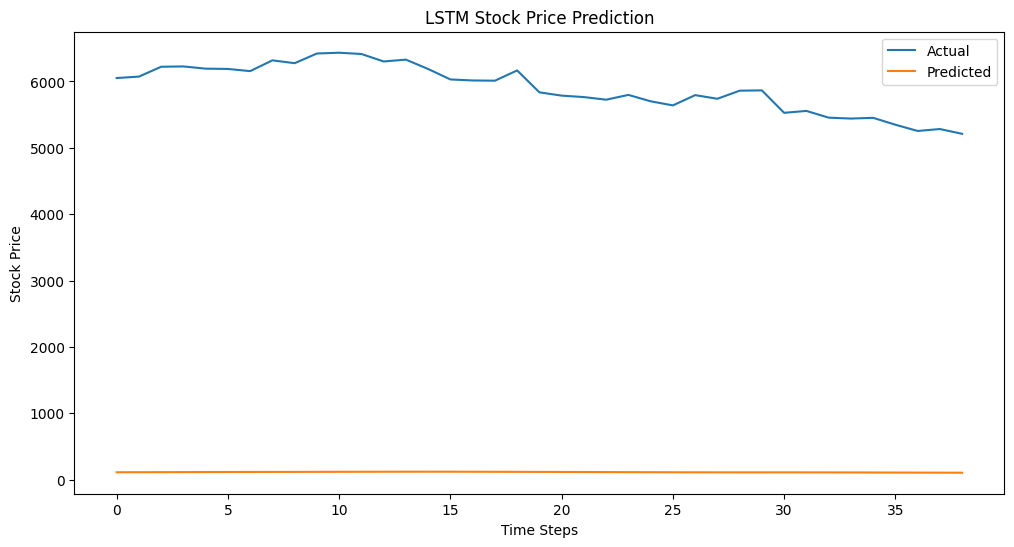

In [20]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


**Answer 1**

   **Normalization** is crucial when working with neural networks like LSTM because it ensures that all input features are on a similar scale. Specifically, normalizing the 'Close' prices helps to:
   - **Prevent large values from dominating**: In raw form, stock prices can vary greatly in magnitude. Without normalization, larger values could dominate the loss function, leading to poor learning performance.
   - **Improve convergence speed**: Normalization can help the model converge faster during training by maintaining numerical stability, preventing issues such as exploding or vanishing gradients.
   - **Maintain consistency**: It ensures that all inputs contribute equally to the learning process, leading to more effective training.



**Answer 2**

 The **Dropout layer** is a regularization technique used to prevent overfitting in neural networks, including LSTM models. Its primary purpose is to:
   - **Randomly deactivate neurons** during training: A specified fraction of the neurons in the layer are "dropped out," meaning they are temporarily ignored during a forward and backward pass.
   - **Force the network to learn more robust features**: By preventing certain neurons from relying too heavily on specific patterns, dropout encourages the model to generalize better on unseen data.
   - **Reduce overfitting**: It discourages the model from becoming too complex and memorizing the training data, leading to better performance on the test set or real-world data.



**Answer 3**

 If the **predicted line** closely follows the **actual line** in the plot, it indicates that:
   - **The model is accurately capturing the underlying patterns** in the stock price movements.
   - **High predictive performance**: The model has learned the temporal dependencies effectively and can predict future prices with a high degree of accuracy.
   - **Good generalization**: The model likely generalizes well to new data, meaning it has successfully learned to predict stock prices rather than memorizing the training data.





 1. The first image seems to show that the model is reasonably accurate, with the predicted values following the actual prices.
 2. The second image, however, suggests that the model is not learning correctly. The predicted values remain flat and do not follow the actual stock prices, indicating that the model may require better tuning or adjustments in hyperparameters, such as learning rate, epochs, or model architecture.


